In [16]:
from pl import *
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

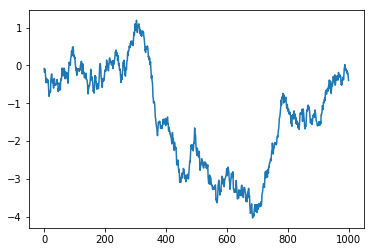

In [17]:
test = bm_basic()
plt.plot(np.arange(1000), test)

Can we use this to generate a bm that switches shape based on realized values? 

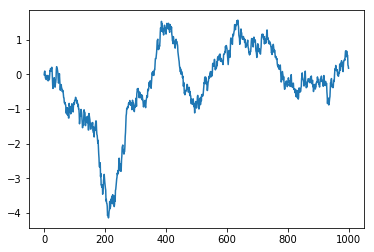

In [18]:
test2 = bm_1switch()
plt.plot(np.arange(1000), test2)

With switching...

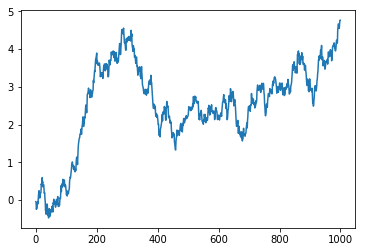

In [19]:
test3 = bm_2switch()
plt.plot(np.arange(1000), test3)

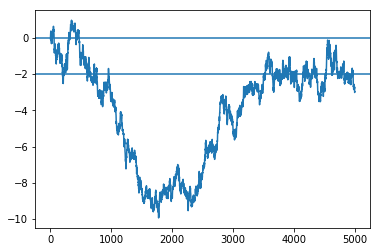

In [20]:
test4 = bm_2switch(n=5000, cut=[0, -2], mus=[.05, -.1])
plt.plot(np.arange(5000), test4)
plt.axhline(0)
plt.axhline(-2)

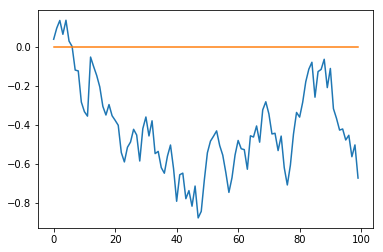

In [21]:
samp_n =100

test5 = bm_basic_d(samp_n)
plt.plot(np.arange(samp_n), test5[0])
plt.plot(np.arange(samp_n), test5[1])

In [22]:
test = lrd(bm_2switch_d, obs=10000, **{"n":250})

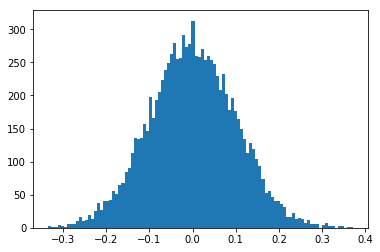

In [23]:
plot = plt.hist(test, bins=100)

In [24]:
def bmv_basic(n=1000, runs= 100, x=0, mu=0, sigma=1, dt=.1):
    vals = np.zeros((runs, n))
    x = np.repeat(x, runs)
    for k in range(n):
        x = x + mu*dt + norm.rvs(size=runs, scale=sigma**2*dt)
        vals[:, k] = x
        
    return vals

In [25]:
vals=np.zeros((10, 100))
x = np.repeat(0, 10)

In [26]:
x = x +.1 + norm.rvs(size=10, scale=1)

In [27]:
sugar = bmv_basic()